In [1]:
dat = read.csv("../datasets/Eulaema.csv")
head(dat)

  Eulaema_nigrita                                                             SA  SU   method   effort altitude MAT  MAP Tseason
1             492                                                Morro_do_Itaoca 1-1 NetTraps 4.189655        6 235 1073    2036
2             372                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-1    Traps 5.204007       17 230  987    1760
3             679                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-2    Traps 5.204007       17 230  987    1760
4             600                                                  Mata_do_Funil 2-3    Traps 5.204007       30 231 1030    1820
5              28 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-1      Net 4.969813        0 259 1693    1074
6             535 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-2      Net 4.969813       43 255 1697    1061
  Pseason    forest.    lu_het
1      53 0.04416404 1.0531299
2      49 0.18217054 0.7571063
3   

In [2]:
summary(dat)

 Eulaema_nigrita        SA                 SU               method              effort          altitude           MAT       
 Min.   :   0.00   Length:178         Length:178         Length:178         Min.   : 1.609   Min.   :  -3.0   Min.   :135.0  
 1st Qu.:  13.00   Class :character   Class :character   Class :character   1st Qu.: 2.996   1st Qu.:  68.0   1st Qu.:207.0  
 Median :  38.00   Mode  :character   Mode  :character   Mode  :character   Median : 4.159   Median : 179.0   Median :228.0  
 Mean   :  81.14                                                            Mean   : 4.157   Mean   : 369.3   Mean   :221.2  
 3rd Qu.:  85.50                                                            3rd Qu.: 4.718   3rd Qu.: 625.0   3rd Qu.:240.0  
 Max.   :1054.00                                                            Max.   :10.020   Max.   :1651.0   Max.   :263.0  
      MAP          Tseason        Pseason         forest.           lu_het      
 Min.   : 623   Min.   : 542   Min.  

In [73]:
mean_count <- mean(dat$Eulaema_nigrita)
sd_count <- sd(dat$Eulaema_nigrita)
threshold <- mean_count + 3*sd_count

dat$outlier_count <- dat$Eulaema_nigrita > threshold
dat[dat$outlier_count,]

    Eulaema_nigrita                                                             SA   SU   method   effort altitude MAT  MAP Tseason Pseason
1               492                                                Morro_do_Itaoca  1-1 NetTraps 4.189655        6 235 1073    2036      53
3               679                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba  2-2    Traps 5.204007       17 230  987    1760      49
4               600                                                  Mata_do_Funil  2-3    Traps 5.204007       30 231 1030    1820      51
6               535 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape  6-2      Net 4.969813       43 255 1697    1061      63
142            1054                       Permanent_Preservation_Area_Vargem_Limpa 60-1    Traps 9.706012      576 207 1229    2389      62
166             529                                  Reserva_Biol\xf3gica_Guaribas 72-1    Traps 4.158883       95 254 1265    1200      61
       forest.    lu

In [4]:
dat$MAT_C <- dat$MAT / 10
dat$Tseason_C <- dat$Tseason / 100

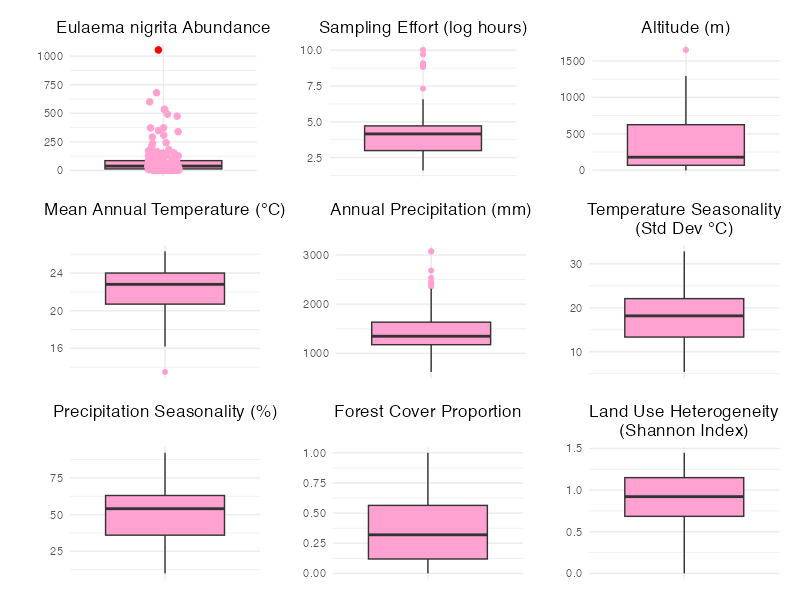

In [21]:
library(ggplot2)
library(patchwork)

numeric_vars <- c("Eulaema_nigrita", "effort", "altitude", "MAT_C", 
                  "MAP", "Tseason_C", "Pseason", "forest.", "lu_het")

nice_labels <- c("Eulaema nigrita Abundance", 
                 "Sampling Effort (log hours)", 
                 "Altitude (m)", 
                 "Mean Annual Temperature (°C)", 
                 "Annual Precipitation (mm)", 
                 "Temperature Seasonality\n(Std Dev °C)", 
                 "Precipitation Seasonality (%)", 
                 "Forest Cover Proportion", 
                 "Land Use Heterogeneity\n(Shannon Index)")

plots <- lapply(seq_along(numeric_vars), function(i) {
  var <- numeric_vars[i]
  label <- nice_labels[i]
  
  if (var == "Eulaema_nigrita") {
    ggplot(dat, aes(x = "", y = .data[[var]])) +
      geom_boxplot(fill = "#ffa2d1ff", outlier.shape = NA) +
      geom_point(aes(color = ifelse(.data[[var]] == 1054, "red", "#ffa2d1ff")),
                 position = position_jitter(width = 0.1), size = 2) +
      scale_color_identity() +
      labs(title = label, y = "") +
      theme_minimal() +
      theme(axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank(),
            plot.title = element_text(hjust = 0.5),
            plot.margin = margin(10,10,10,10))
    
  } else {
    ggplot(dat, aes(x = "", y = .data[[var]])) +
      geom_boxplot(fill = "#ffa2d1ff", outlier.color = "#ffa2d1ff") +
      labs(title = label, y = "") +
      theme_minimal() +
      theme(axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank(),
            plot.title = element_text(hjust = 0.5),
            plot.margin = margin(10,10,10,10))
  }
})

panel <- (plots[[1]] | plots[[2]] | plots[[3]]) /
         (plots[[4]] | plots[[5]] | plots[[6]]) /
         (plots[[7]] | plots[[8]] | plots[[9]])

panel


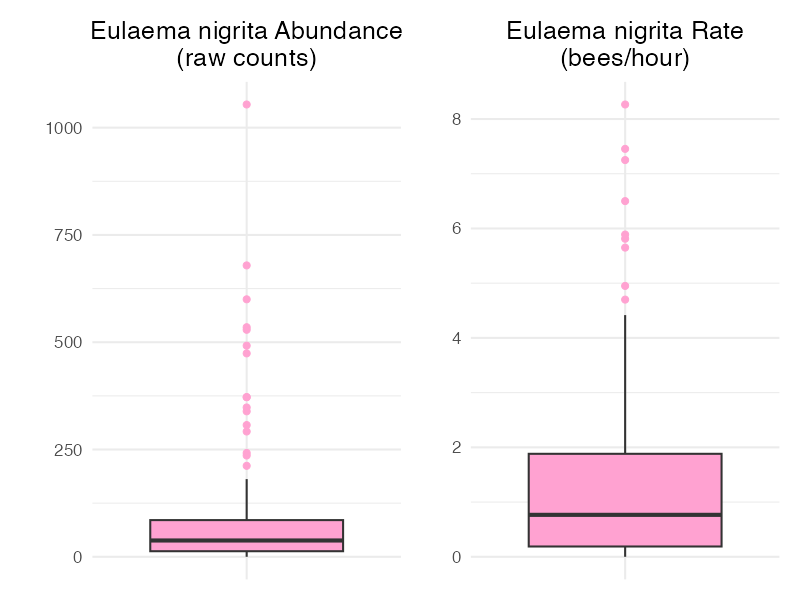

In [ ]:
library(ggplot2)
library(patchwork)

dat$rate <- dat$Eulaema_nigrita / exp(dat$effort)

p1 <- ggplot(dat, aes(x = "", y = Eulaema_nigrita)) +
  geom_boxplot(fill = "#ffa2d1ff", outlier.color = "#ffa2d1ff") +  
  labs(title = "Eulaema nigrita Abundance\n(raw counts)", y = "") +
  theme_minimal(base_size = 16) +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(10,10,10,10))

p2 <- ggplot(dat, aes(x = "", y = rate)) +
  geom_boxplot(fill = "#ffa2d1ff", outlier.color = "#ffa2d1ff") +
  labs(title = "Eulaema nigrita Rate\n(bees/hour)", y = "") +
  theme_minimal(base_size = 16) +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(10,10,10,10))

panel <- p1 | p2
panel


In [94]:
summary(dat$effort)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.609   2.996   4.159   4.157   4.718  10.020 

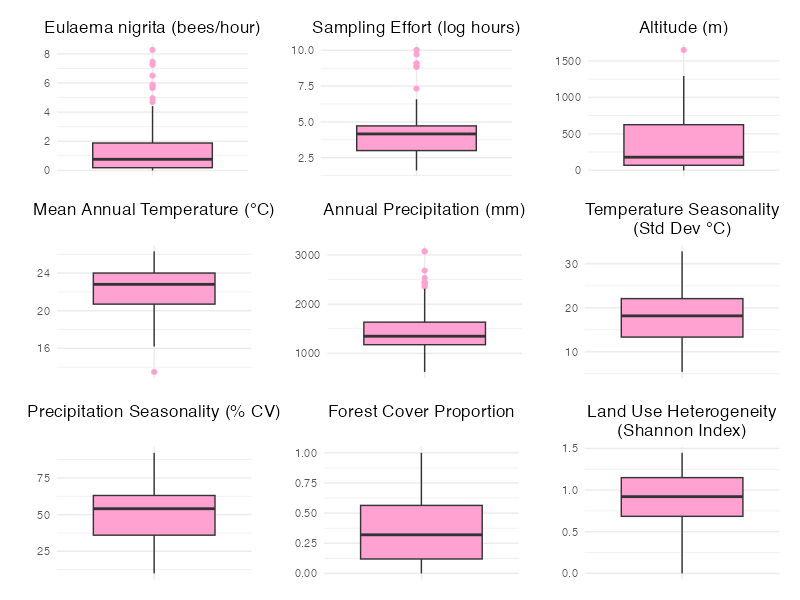

In [ ]:
library(ggplot2)
library(patchwork)

dat$rate <- dat$Eulaema_nigrita / exp(dat$effort)

numeric_vars <- c("rate", "effort", "altitude", "MAT_C", 
                  "MAP", "Tseason_C", "Pseason", "forest.", "lu_het")

nice_labels <- c("Eulaema nigrita (bees/hour)", 
                 "Sampling Effort (log hours)", 
                 "Altitude (m)", 
                 "Mean Annual Temperature (°C)", 
                 "Annual Precipitation (mm)", 
                 "Temperature Seasonality\n(Std Dev °C)", 
                 "Precipitation Seasonality (% CV)", 
                 "Forest Cover Proportion", 
                 "Land Use Heterogeneity\n(Shannon Index)")

plots <- lapply(seq_along(numeric_vars), function(i) {
  var <- numeric_vars[i]
  label <- nice_labels[i]
  
  ggplot(dat, aes(x = "", y = .data[[var]])) +
    geom_boxplot(fill = "#ffa2d1ff", outlier.color = "#ffa2d1ff") +
    labs(title = label, y = "") +
    theme_minimal() +
    theme(axis.title.x = element_blank(),
          axis.text.x = element_blank(),
          axis.ticks.x = element_blank(),
          plot.title = element_text(hjust = 0.5),
          plot.margin = margin(10,10,10,10))
})

panel <- (plots[[1]] | plots[[2]] | plots[[3]]) /
         (plots[[4]] | plots[[5]] | plots[[6]]) /
         (plots[[7]] | plots[[8]] | plots[[9]])

panel


In [95]:
library(dplyr)

dat_clean <- dat %>%
  filter(Eulaema_nigrita != 1054)

dat_clean$method <- factor(dat_clean$method)

num_vars <- c("effort", "altitude", "MAT_C", "MAP", "Tseason_C", "Pseason", "forest.", "lu_het")
dat_clean_scaled <- dat_clean
dat_clean_scaled[num_vars] <- scale(dat_clean[num_vars])


In [7]:
m = glm(Eulaema_nigrita ~ MAT_C + Tseason_C + Pseason + effort + altitude + forest. + lu_het + method,
        family = "poisson", data = dat_clean_scaled)


In [8]:
summary(m)


Call:
glm(formula = Eulaema_nigrita ~ MAT_C + Tseason_C + Pseason + 
    effort + altitude + forest. + lu_het + method, family = "poisson", 
    data = dat_clean_scaled)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.116435   0.015367 267.875   <2e-16 ***
MAT_C          -0.606469   0.032004 -18.950   <2e-16 ***
Tseason_C      -0.496765   0.016963 -29.285   <2e-16 ***
Pseason         0.504028   0.013816  36.481   <2e-16 ***
effort          0.469066   0.010574  44.360   <2e-16 ***
altitude       -0.652109   0.029392 -22.186   <2e-16 ***
forest.        -0.274972   0.010666 -25.781   <2e-16 ***
lu_het         -0.020939   0.009776  -2.142   0.0322 *  
methodNetTraps -0.286695   0.032739  -8.757   <2e-16 ***
methodTraps    -0.060475   0.027404  -2.207   0.0273 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 19753  on 176  degrees of freedom
Residual 

In [9]:
dispersion = m$deviance / m$df.residual
dispersion

[1] 76.93063

In [36]:
library(MASS)
m_nb = glm.nb(Eulaema_nigrita ~ offset(effort) + altitude + MAT_C + MAP + Tseason_C + Pseason + forest. + lu_het + method, 
              data = dat_clean_scaled)

In [37]:
summary(m_nb)


Call:
glm.nb(formula = Eulaema_nigrita ~ offset(effort) + altitude + 
    MAT_C + MAP + Tseason_C + Pseason + forest. + lu_het + method, 
    data = dat_clean_scaled, init.theta = 1.053772719, link = log)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.21947    0.10676  39.522  < 2e-16 ***
altitude       -0.54454    0.24965  -2.181 0.029165 *  
MAT_C          -0.66146    0.28233  -2.343 0.019138 *  
MAP            -0.64495    0.09585  -6.729 1.71e-11 ***
Tseason_C      -0.78985    0.13161  -6.001 1.96e-09 ***
Pseason         0.36161    0.09384   3.853 0.000116 ***
forest.        -0.37295    0.09114  -4.092 4.28e-05 ***
lu_het         -0.07272    0.08402  -0.865 0.386772    
methodNetTraps -0.43705    0.25607  -1.707 0.087867 .  
methodTraps    -0.88333    0.19591  -4.509 6.52e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0538) family taken to be 1)

    Null deviance: 3

In [12]:
dispersion <- m_nb$deviance / m_nb$df.residual
dispersion

[1] 1.223332

In [28]:
m_nb_1_scaled_effort = glm.nb(Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + Pseason + forest. + method + offset(effort), 
              data = dat_clean_scaled)
summary(m_nb_1_scaled_effort)


Call:
glm.nb(formula = Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + 
    Pseason + forest. + method + offset(effort), data = dat_clean_scaled, 
    init.theta = 1.04967478, link = log)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.21466    0.10645  39.594  < 2e-16 ***
altitude       -0.55796    0.24999  -2.232   0.0256 *  
MAT_C          -0.67718    0.28262  -2.396   0.0166 *  
MAP            -0.64507    0.09602  -6.718 1.84e-11 ***
Tseason_C      -0.78768    0.13113  -6.007 1.89e-09 ***
Pseason         0.37260    0.09340   3.989 6.62e-05 ***
forest.        -0.34935    0.08681  -4.024 5.72e-05 ***
methodNetTraps -0.40685    0.25105  -1.621   0.1051    
methodTraps    -0.87626    0.19608  -4.469 7.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0497) family taken to be 1)

    Null deviance: 333.15  on 176  degrees of freedom
Residual deviance: 203.03  on 16

In [69]:
dispersion <- m_nb_1_scaled_effort$deviance / m_nb_1_scaled_effort$df.residual
dispersion

[1] 1.208501

In [ ]:
1-(m_nb_1_scaled_effort$deviance/m_nb_1_scaled_effort$null.deviance)

[1] 0.4514562

In [29]:
library(car)
vif(m_nb_1_scaled_effort)

               GVIF Df GVIF^(1/(2*Df))
altitude  11.114801  1        3.333887
MAT_C     14.146424  1        3.761173
MAP        1.473181  1        1.213747
Tseason_C  2.917497  1        1.708068
Pseason    1.560619  1        1.249247
forest.    1.295089  1        1.138020
method     1.651792  2        1.133676

In [ ]:
library(broom)  

tidy_nb <- broom::tidy(m_nb_1_scaled_effort, conf.int = TRUE, exponentiate = TRUE)  # exponentiate gives multiplicative effect

tidy_nb <- tidy_nb %>%
  dplyr::mutate(
    percent_change = (estimate - 1) * 100,
    lower_CI_pct = (conf.low - 1) * 100,
    upper_CI_pct = (conf.high - 1) * 100
  ) %>%
  dplyr::select(term, estimate, percent_change, conf.low, conf.high, lower_CI_pct, upper_CI_pct, p.value)

tidy_nb <- tidy_nb %>%
  dplyr::mutate(
    type = ifelse(grepl("method", term), "Factor", "Numeric")
  )

tidy_nb

# A tibble: 9 × 9
  term           estimate percent_change conf.low conf.high lower_CI_pct upper_CI_pct  p.value type   
  <chr>             <dbl>          <dbl>    <dbl>     <dbl>        <dbl>        <dbl>    <dbl> <chr>  
1 (Intercept)      67.7           6667.    55.1      84.2         5410.       8318.   0        Numeric
2 altitude          0.572          -42.8    0.345     0.947        -65.5        -5.29 2.56e- 2 Numeric
3 MAT_C             0.508          -49.2    0.280     0.919        -72.0        -8.09 1.66e- 2 Numeric
4 MAP               0.525          -47.5    0.440     0.628        -56.0       -37.2  1.84e-11 Numeric
5 Tseason_C         0.455          -54.5    0.340     0.606        -66.0       -39.4  1.89e- 9 Numeric
6 Pseason           1.45            45.2    1.19      1.76          19.4        76.0  6.62e- 5 Numeric
7 forest.           0.705          -29.5    0.591     0.846        -40.9       -15.4  5.72e- 5 Numeric
8 methodNetTraps    0.666          -33.4    0.401     1

In [41]:
m_nb_1 = glm.nb(Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + Pseason + forest. + method + offset(effort), 
              data = dat_clean)
summary(m_nb_1)


Call:
glm.nb(formula = Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + 
    Pseason + forest. + method + offset(effort), data = dat_clean, 
    init.theta = 0.9321565651, link = log)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    10.5226316  3.6735975   2.864  0.00418 ** 
altitude       -0.0012184  0.0007420  -1.642  0.10059    
MAT_C          -0.2335331  0.1325131  -1.762  0.07801 .  
MAP            -0.0015965  0.0002484  -6.426 1.31e-10 ***
Tseason_C      -0.1442675  0.0258487  -5.581 2.39e-08 ***
Pseason         0.0147668  0.0046594   3.169  0.00153 ** 
forest.        -1.3729961  0.3254003  -4.219 2.45e-05 ***
methodNetTraps -0.5000937  0.2666633  -1.875  0.06074 .  
methodTraps    -1.1471667  0.2080707  -5.513 3.52e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.9322) family taken to be 1)

    Null deviance: 336.05  on 176  degrees of freedom
Residual deviance

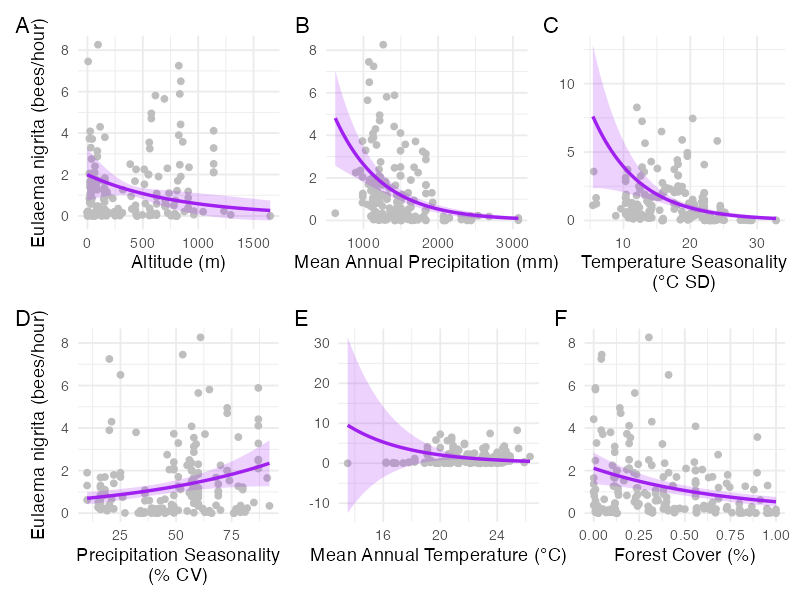

In [ ]:
library(ggplot2)
library(patchwork)

key_vars <- c("altitude", "MAP", "Tseason_C", "Pseason", "MAT_C", "forest.")

nice_labels <- c("Altitude (m)",
                 "Mean Annual Precipitation (mm)",
                 "Temperature Seasonality\n(°C SD)",
                 "Precipitation Seasonality\n(% CV)",
                 "Mean Annual Temperature (°C)",
                 "Forest Cover (%)")

plots <- list()

mean_effort_hours <- exp(mean(dat_clean$effort, na.rm = TRUE))

for(i in seq_along(key_vars)) {
  var <- key_vars[i]
  
  new_data <- data.frame(
    effort = mean(dat_clean$effort, na.rm=TRUE),  
    altitude = mean(dat_clean$altitude, na.rm=TRUE),
    MAT_C = mean(dat_clean$MAT_C, na.rm=TRUE),
    MAP = mean(dat_clean$MAP, na.rm=TRUE),
    Tseason_C = mean(dat_clean$Tseason_C, na.rm=TRUE),
    Pseason = mean(dat_clean$Pseason, na.rm=TRUE),
    forest. = mean(dat_clean$forest., na.rm=TRUE),
    method = factor("Net", levels=levels(dat_clean$method))
  )
  
  new_data <- new_data[rep(1, 100), ]
  new_data[[var]] <- seq(min(dat_clean[[var]], na.rm=TRUE),
                         max(dat_clean[[var]], na.rm=TRUE), length.out=100)
  
  # Predict
  pred <- predict(m_nb_1, newdata = new_data, type="response", se.fit = TRUE)
  
  new_data$fit_rate <- pred$fit / mean_effort_hours
  new_data$upper_rate <- (pred$fit + 1.96 * pred$se.fit) / mean_effort_hours
  new_data$lower_rate <- (pred$fit - 1.96 * pred$se.fit) / mean_effort_hours
  
  dat_clean$rate <- dat_clean$Eulaema_nigrita / exp(dat_clean$effort)
  
  # Plot
  p <- ggplot(new_data, aes(x = .data[[var]], y = fit_rate)) +
    geom_point(data = dat_clean, aes(x = .data[[var]], y = rate), color = "grey") +
    geom_line(color = "purple", linewidth = 1.2) +
    geom_ribbon(aes(ymin = lower_rate, ymax = upper_rate), alpha = 0.2, fill = "purple") +
    labs(x = nice_labels[i], y = "Eulaema nigrita (bees/hour)") +
    theme_minimal(base_size = 14) +
    theme(
      plot.margin = unit(c(0.2,0.2,0.2,0.2), "cm"),
      axis.title.y = if(i == 1 || i == 4) element_text(margin=margin(r=10)) else element_blank()
    )
  
  plots[[i]] <- p
}

panel <- (plots[[1]] | plots[[2]] | plots[[3]]) /
         (plots[[4]] | plots[[5]] | plots[[6]]) &
         plot_annotation(tag_levels = 'A')

panel


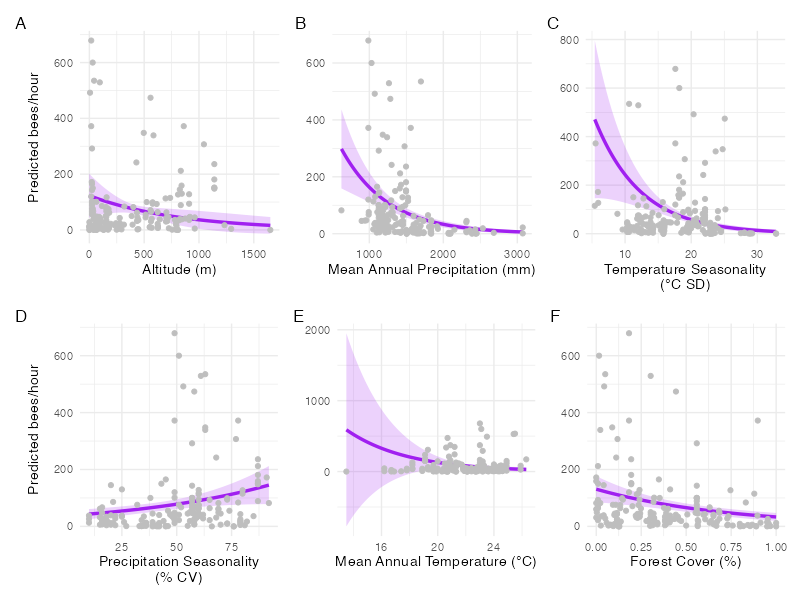

In [ ]:
library(ggplot2)
library(patchwork)

key_vars <- c("altitude", "MAP", "Tseason_C", "Pseason", "MAT_C", "forest.")

nice_labels <- c("Altitude (m)",
                 "Mean Annual Precipitation (mm)",
                 "Temperature Seasonality\n(°C SD)",
                 "Precipitation Seasonality\n(% CV)",
                 "Mean Annual Temperature (°C)",
                 "Forest Cover (%)")

plots <- list()

for(i in seq_along(key_vars)) {

  var <- key_vars[i]

  new_data <- as.data.frame(lapply(dat_clean, function(x) {
    if(is.numeric(x)) mean(x, na.rm = TRUE) else x[1]
  }))

  new_data <- new_data[rep(1, 100), ]  # expand to 100 rows
  new_data[[var]] <- seq(
    min(dat_clean[[var]], na.rm = TRUE),
    max(dat_clean[[var]], na.rm = TRUE),
    length.out = 100
  )

  if("method" %in% names(dat_clean)) {
    new_data$method <- factor(levels(dat_clean$method)[1],
                               levels = levels(dat_clean$method))
  }

  # Predictions
  pred <- predict(m_nb_1, newdata = new_data, type = "response", se.fit = TRUE)

  new_data$fit   <- pred$fit
  new_data$upper <- pred$fit + 1.96 * pred$se.fit
  new_data$lower <- pred$fit - 1.96 * pred$se.fit

  # Make plot
  p <- ggplot(new_data, aes(x = .data[[var]], y = fit)) +
    geom_line(color = "purple", linewidth = 1.2) +
    geom_ribbon(aes(ymin = lower, ymax = upper), alpha = 0.2, fill = "purple") +
    geom_point(data = dat_clean, aes(x = .data[[var]], y = Eulaema_nigrita), color = "grey") +
    labs(x = nice_labels[i], y = "Predicted bees/hour") +
    theme_minimal() +
    theme(
      plot.margin = unit(c(0.2,0.2,0.2,0.2), "cm"),
      axis.title.y = if(i == 1 || i == 4) element_text(margin=margin(r=10)) else element_blank()
    )

  plots[[i]] <- p
}

# Combine plot panel
panel <- (plots[[1]] | plots[[2]] | plots[[3]]) /
         (plots[[4]] | plots[[5]] | plots[[6]]) &
         plot_annotation(tag_levels = 'A')

panel


In [57]:
library(emmeans)
emm_method <- emmeans(m_nb_1, specs = "method", type = "response")
emm_method

 method   response    SE  df asymp.LCL asymp.UCL
 Net          78.5  8.86 Inf      62.9      97.9
 NetTraps     47.6 10.80 Inf      30.5      74.3
 Traps        24.9  4.12 Inf      18.0      34.5

Confidence level used: 0.95 
Intervals are back-transformed from the log scale 

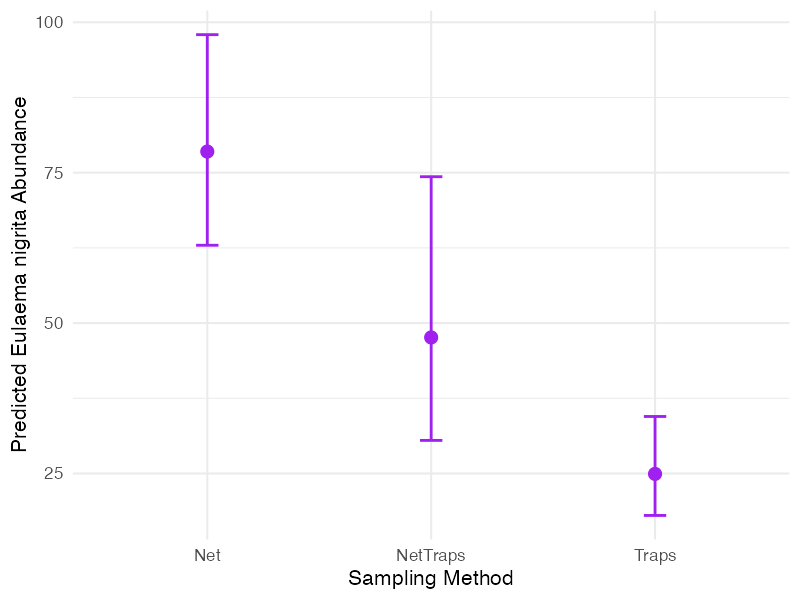

In [ ]:

plot_method <- as.data.frame(emm_method)

ggplot(plot_method, aes(x = method, y = response)) +
  geom_point(size = 4, color = "purple") +
  geom_errorbar(aes(ymin = asymp.LCL, ymax = asymp.UCL),
                width = 0.1, color = "purple", linewidth = 1) +
  labs(
    x = "Sampling Method",
    y = "Predicted Eulaema nigrita Abundance"
  ) +
  theme_minimal(base_size = 16)
